# Quiz 2 - Manejo de tensores, gradientes y redes neuronales

La siguiente actividad puedes realizar de manera individual. Sin embargo, no es un examen y puedes consultar dudas con compañeras y compañeros del cursos.

El objetivo de la actividad es ayudar a identificar dudas e inquietudes, con el prpósito de aclararlas antes del primer examen del curso.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import h5py
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras.models as models
from keras.models import load_model


### 1. Grafos de cómputo

Implementa en TensorFlow el siguiente grafo de cómputo al que llamaremos **rnnCell**. Recordemos que en un grafo de cómputo los nodos(vértices) son operaciones y las aristas representan tensores (entrada/salida).
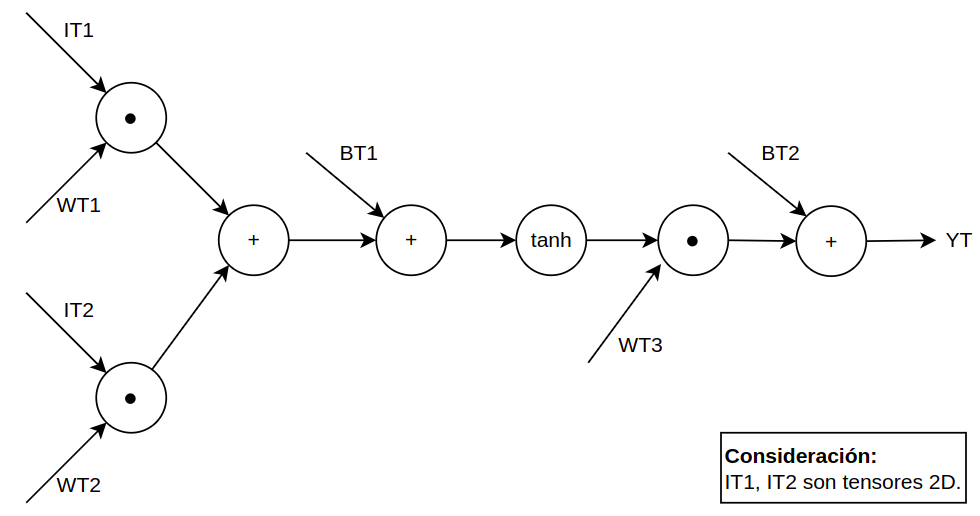

Para la construcción del gráfo de cómputo, debes tomar como restricción que IT1 e IT2 son tensores 2D. Tienes total libertad para determinar valores iniciales y dimensiones de los tensores IT1 e IT2 (respetando la restricción del orden). Para el resto de operandos, tienes total libertad.

In [2]:
def rnnCell(IT1, IT2):
    WT1 = tf.Variable(tf.random.uniform([2, 2], -1, 1, seed=1234), name="WT1")
    BT1 = tf.Variable(tf.random.uniform([2], -1, 1, seed=1234), name="BT1")
    WT2 = tf.Variable(tf.random.uniform([2, 2], -1, 1, seed=1234), name="WT2")
    BT2 = tf.Variable(tf.random.uniform([2], -1, 1, seed=1234), name="BT2")
    WT3 = tf.Variable(tf.random.uniform([2, 2], -1, 1, seed=1234), name="WT3")

    YT = tf.tanh(tf.add(tf.matmul(IT1, WT1) + BT1, tf.matmul(IT2, WT2) + BT2 + tf.matmul(IT1, WT3)))

    return YT


IT1 = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
IT2 = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)

YT = rnnCell(IT1, IT2)

print(YT)


tf.Tensor(
[[ 0.9692686 -1.       ]
 [ 0.9947615 -1.       ]], shape=(2, 2), dtype=float32)


### Responde las siguientes preguntas:

#### ¿Qué características tienen los tensores IT1, IT2?

Ambos tienen dos dimensiones. Esto se debe a que la operación tf.matmul() requiere que los tensores de entrada tengan el mismo número de columnas.

#### ¿Qué características tiene los tensor WT1, WT2, WT3, BT1, BT2? ¿porque?

Los tensores WT1, WT2, WT3, BT1 y BT2 son tensores 2D de tamaño. Esto significa que tienen dos dimensiones.

Los tensores WT1 y WT2 se utilizan para multiplicar los tensores IT1 e IT2.

Los tensores BT1 y BT2 se utilizan para agregar los resultados de las operaciones de multiplicación.

#### ¿Qué características tiene el tensor resultante de aplicar la función tanh()?

El tensor resultante de aplicar la función tanh() es un tensor 2D de tamaño arbitrario. El rango de salida de la función tanh() es [-1, 1].

#### ¿Qué características tiene el tensor YT?

El tensor YT es el tensor resultante de aplicar la función tanh() a la salida de la operación de multiplicación. Por lo tanto, tiene las mismas características que el tensor resultante de la operación de multiplicación, es decir, es un tensor 2D de tamaño arbitrario con valores dentro del rango [-1, 1].

#### Dados los tensores que definiste IT1, WT1, IT2, WT2, BT1, WT3 y BT2, ¿cuál es el resultado de aplicar las operaciones descritas en el gráfo de cómputo?

El resultado de aplicar las operaciones descritas en el grafo de cómputo es el tensor YT.


### 2. Cálculo de gradientes

El gráfo de cómputo que has implementado se puede ver como la función compuesta YT, cuyos parámetros son WT1, WT2, BT1, WT3, BT2 y los datos de entrada IT1 e IT2. Utiliza la cinta de gradientes que provee TensorFlow para hacer el cálculo de los gradientes de YT con respecto a sus parámetros.

In [3]:
def rnnCell(IT1, IT2):
    WT1 = tf.Variable(tf.random.uniform([2, 2], -1, 1, seed=1234), name="WT1")
    BT1 = tf.Variable(tf.random.uniform([2], -1, 1, seed=1234), name="BT1")
    WT2 = tf.Variable(tf.random.uniform([2, 2], -1, 1, seed=1234), name="WT2")
    BT2 = tf.Variable(tf.random.uniform([2], -1, 1, seed=1234), name="BT2")
    WT3 = tf.Variable(tf.random.uniform([2, 2], -1, 1, seed=1234), name="WT3")

    with tf.GradientTape() as tape:
        YT = tf.tanh(tf.add(tf.matmul(IT1, WT1) + BT1, tf.matmul(IT2, WT2) + BT2 + tf.matmul(IT1, WT3)))

    gradients = tape.gradient(YT, [WT1, WT2, WT3, BT1, BT2])

    return YT, gradients


IT1 = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
IT2 = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)

YT, gradients = rnnCell(IT1, IT2)

print(YT)
print("")
print(gradients)


tf.Tensor(
[[ 1.         -0.9984625 ]
 [ 1.         -0.99999416]], shape=(2, 2), dtype=float32)

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.        , 0.00310767],
       [0.        , 0.00619197]], dtype=float32)>, <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.        , 0.01544487],
       [0.        , 0.01852918]], dtype=float32)>, <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.        , 0.00310767],
       [0.        , 0.00619197]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.       , 0.0030843], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.       , 0.0030843], dtype=float32)>]


### Responde las siguientes preguntas:

#### ¿Cuál es el gradiente de WT1?
Matriz de 2x2:

[[0.00122887, 0.00228965]
 [0.00240076, 0.00449896]]

#### ¿Cuál es el gradiente de WT2?
Matriz de 2x2:
[[0.00591642, 0.01112688]
 [0.0070883 , 0.01333618]]

#### ¿Cuál es el gradiente de BT1?
Vector de 2x1:
[0.00117189, 0.00220931]

#### ¿Cuál es el gradiente de WT3?
Matriz de 2x2:
[[0.00122887, 0.00228965]
 [0.00240076, 0.00449896]]

#### ¿Cuál es el gradiente de BT2?
Vector de 2x1:
[0.00117189, 0.00220931]


### 3. Construcción de una red neuronal para el reconocimiento de rostros

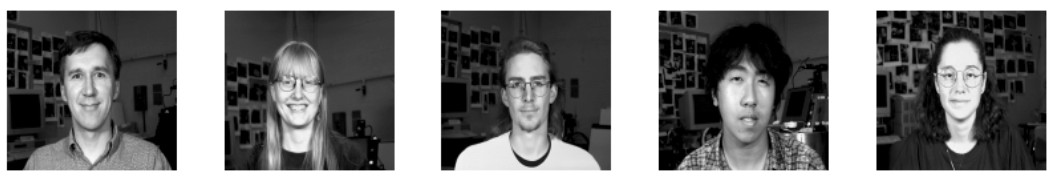

En esta actividad implementaremos una red neuronal tipo perceptrón multicapa utilizando Keras para resolver un problema de reconocimiento de rostros. La actividad se plantea desde dos perspectivas, puedes seleccionar la versión que prefieras.

* El primer planteamiento consiste en construir una red neuronal para el reconocimiento de rostros en imágenes (escala de grises). Para este caso, las imágenes pueden pertener a una de tres clases: an2i, tammo y saavik. Para la actividad se utilizará el dataset: **faces.hdf5**. Si no has trabajo con el formato hdf5, no te preocupes. Podemos cargar la información de la imágen de la siguiente manera:

```
import numpy as np
import h5py

# Cargar el dataset almacenado en formato hdf5: imágenes y etiquetas
def load_dataset(hdf5_path):
    dataset=h5py.File(hdf5_path, 'r')
    X = np.array(dataset["images"][:])
    Y = np.array(dataset["labels"][:])
    return X, Y
```

```
#Ejemplo de uso:
path="/content/drive/MyDrive/ML2023o/S11/faces.hdf5"
X, Y = load_dataset(path)
```
* El segundo planteamiento consiste en construir una red neuronal para identificar la postura del rostro en la que se encuentra una persona en la imagen (de frente, arriba, izquierda, derecha, con lentes o sin lentes). Para esta segunda etapa de la actividad utilizaremos el conjunto de imágenes que se encuentran en el archivo **faces.zip**.

Las imágenes que utilizaremos, son rostros de estudiantes de la Universidad de Carnegie Mellon (curso de Machine Learning, profesor Tom Mitchel). Las imágenes son públicas y pueden ser descargadas de diversos repositorios en la web. Nosotros utilizaremos un subconjunto del dataset original, preparado para nuestra actividad.

Conjuntos de datos y archivo con funciones utilitarias:

| Función | Descripción |
| --- | --- |
| [faces.hdf5](https://drive.google.com/file/d/1bYEWogtGyhGyy3cypYOuiK9dTAhxEwVE/view?usp=sharing) | Conjunto de datos (imágenes) en formato hdf5 |
| [faces.zip](https://drive.google.com/file/d/1WUu-f4pp4xEaO4_8ZhetdsS471yq0xuv/view?usp=sharing) | Imágenes organizadas en carpetas, acorde a la clase a la que pertenece la imagen (boland, bpm, ch4f, cheyer, choon, mitchell, phoebe, tammo) |
| [utils.py](https://drive.google.com/file/d/13BHRMyoSYcXatXWRUGsyQ-tG_x5CIbfH/view?usp=sharing) | Archivos con funciones de apoyo para: 1) cargar el dataset en formato hdf5 y 2) generar datasets hdf5 a partir de imágenes almacenadas en carpetas |


In [4]:
import numpy as np
import h5py

# Cargar el dataset almacenado en formato hdf5: imágenes y etiquetas
def load_dataset(hdf5_path):
    dataset=h5py.File(hdf5_path, 'r')
    X = np.array(dataset["images"][:])
    Y = np.array(dataset["labels"][:])
    return X, Y

path="faces.hdf5"
X, Y = load_dataset(path)

In [5]:
Y

array([2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1,
       0, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 2,
       0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2,
       1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0,
       0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2,
       2, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2,
       2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1,
       2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2,
       0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1], dtype=uint8)

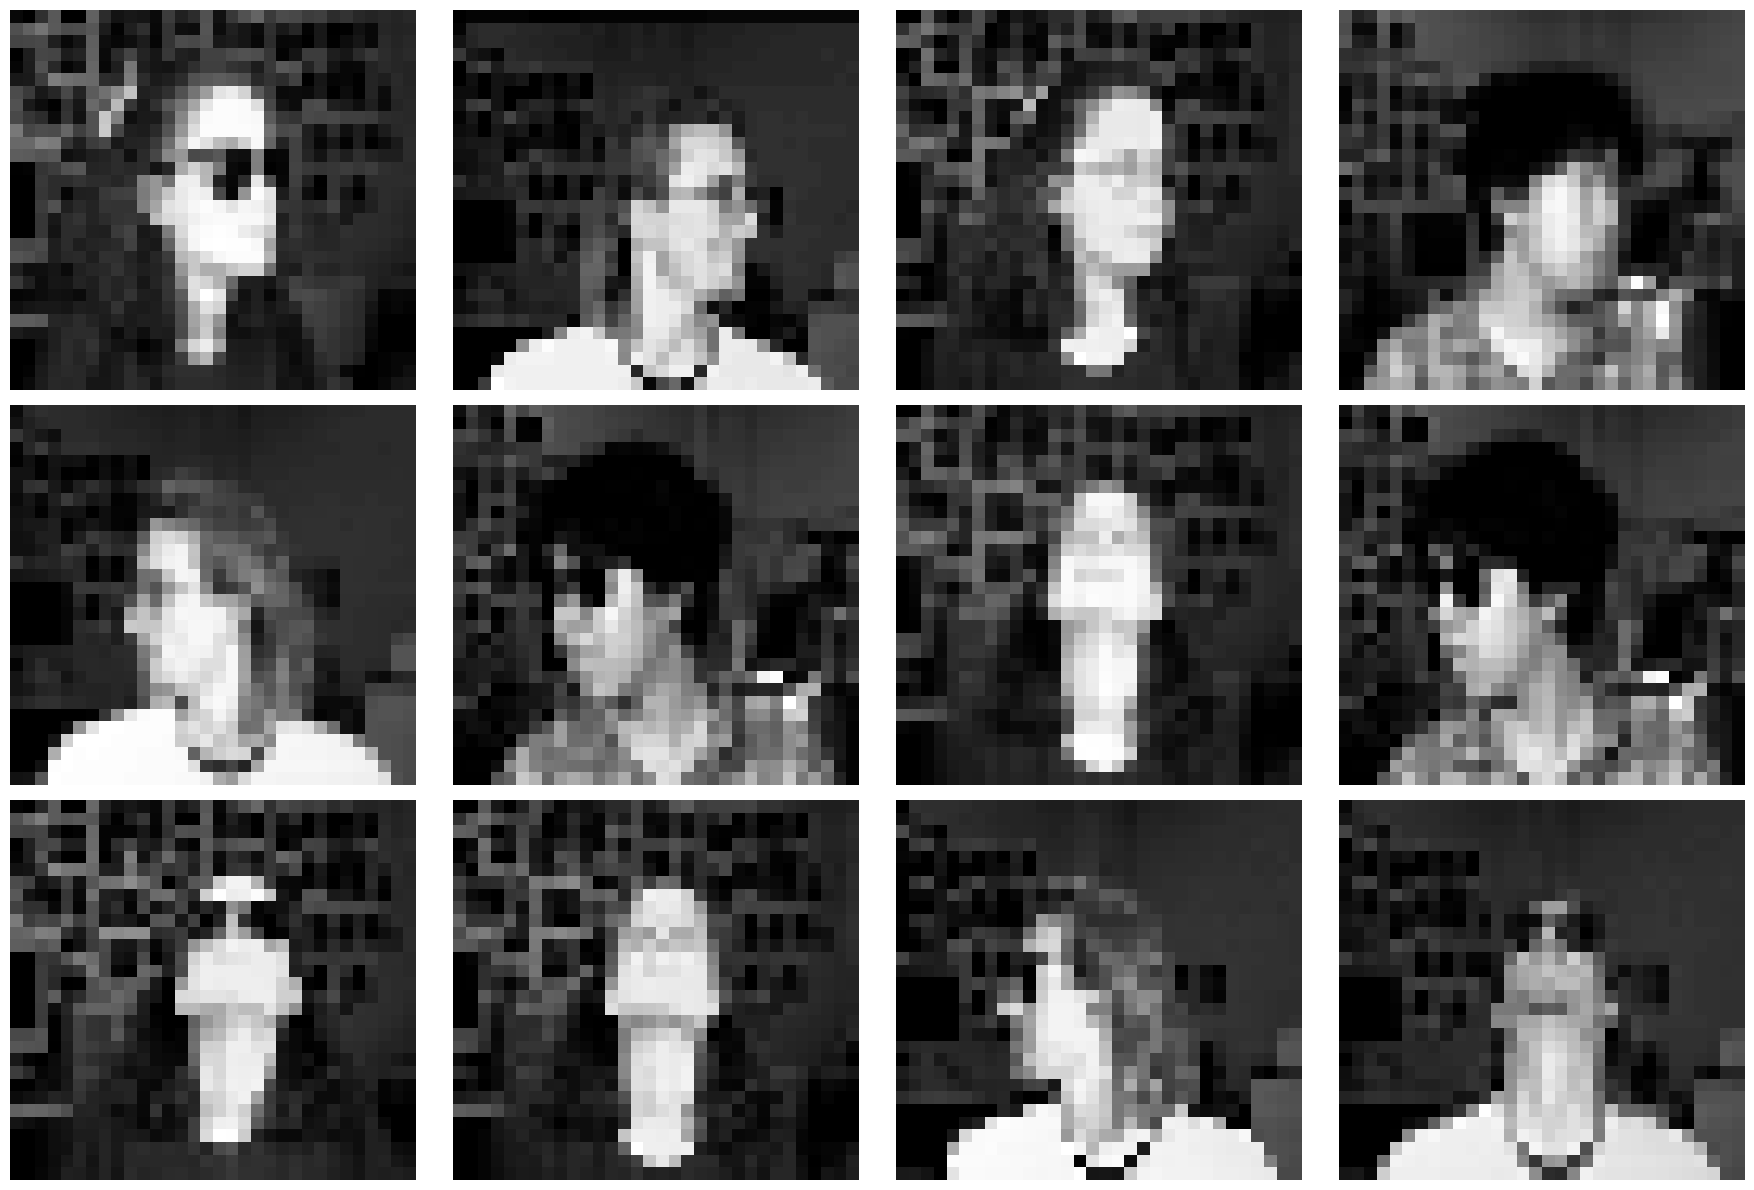

In [6]:
def display_images(images, num_to_display):
    num_cols = 4
    num_rows = (num_to_display + num_cols - 1) // num_cols

    plt.figure(figsize=(18, 12))

    for i in range(num_to_display):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(images[i], interpolation='nearest', cmap="gray")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

num_to_display = 12
display_images(X, num_to_display)


In [7]:
# Análisis descriptivo de los datos

def descriptive_analysis(images):
    num_images = images.shape[0]
    image_shape = images[0].shape
    min_value = np.min(images)
    max_value = np.max(images)
    mean_value = np.mean(images)
    std_deviation = np.std(images)

    print(f"Número total de imágenes: {num_images}")
    print(f"Dimensiones de las imágenes: {image_shape}")
    print(f"Valor mínimo de píxel: {min_value}")
    print(f"Valor máximo de píxel: {max_value}")
    print(f"Valor medio de píxel: {mean_value}")
    print(f"Desviación estándar de píxel: {std_deviation}")

descriptive_analysis(X)


Número total de imágenes: 282
Dimensiones de las imágenes: (30, 32)
Valor mínimo de píxel: 0
Valor máximo de píxel: 255
Valor medio de píxel: 47.30888741134752
Desviación estándar de píxel: 51.63525112365168


In [8]:
num_classes = len(np.unique(Y))
print(f"Número de clases: {num_classes}")

Número de clases: 3


In [9]:
# Preparación de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Y_test_onehot = to_categorical(Y_test, num_classes=3)

In [10]:
# Implementación de red neuronal
model = models.Sequential()
model.add(Dense(64, activation='tanh', input_shape=(960,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
Y_train_onehot = to_categorical(Y_train, num_classes=3)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                61504     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 63683 (248.76 KB)
Trainable params: 63683 (248.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Entrenamiento y validación de la red neuronal
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train_onehot, epochs=6, batch_size=100, verbose = 1)

test_loss, test_accuracy = model.evaluate(X_test, Y_test_onehot)
print(f"Precisión en el conjunto de prueba: {test_accuracy}")


Epoch 1/6
2/2 [==============================] - 3s 71ms/step - loss: 1.2732 - accuracy: 0.3198
Epoch 2/6
2/2 [==============================] - 0s 27ms/step - loss: 0.8955 - accuracy: 0.6142
Epoch 3/6
2/2 [==============================] - 0s 25ms/step - loss: 0.6982 - accuracy: 0.7716
Epoch 4/6
2/2 [==============================] - 0s 16ms/step - loss: 0.5789 - accuracy: 0.9086
Epoch 5/6
2/2 [==============================] - 0s 25ms/step - loss: 0.4946 - accuracy: 0.9442
Epoch 6/6
3/3 [==============================] - 0s 12ms/step - loss: 0.4415 - accuracy: 0.9647
Precisión en el conjunto de prueba: 0.9647058844566345


Ahora que finalizo el entrenamiento y validación del modelo base, es momento de:

#### a) Analizar lo que sucedio en el entrenamiento (loss y métricas con datos de entrenamiento y validación).

- `Loss (Entrenamiento)`: Va disminuyendo conforme las epocas
- `Metricas (Entrenamiento)`: Las de accuracy va subiendo conforme las epocas

- `Loss (Validación)`: Lo mismo que en el entrenamiento
- `Metricas (Validación)`: Lo mismo que en el entrenamiento

#### b) Describir sus hallazgos, generar supuestos/hipótesis respecto a que ajustes requiere realizar para volver a entrenar la red neuronal. Asignar una prioridad a cada posible ajuste.

- `1er modelo`: Al principio utilize un label encoder para el proceso, dividí el `test size fue de 0.6` (Lo cual ya sabía que era incorrecto), también normalicé los datos:
```
import numpy as np
from sklearn.model_selection import train_test_split
# Paso 1: Normalizar las imágenes (escalar los píxeles al rango [0, 1])
def normalize_images(images):
    return images / 255.0
X_normalized = normalize_images(X)
# Paso 2: Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)
# Paso 3: Codificar etiquetas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)
```
Este proceso despues en elegí solo utilizar una capa oculta con 128 neuronas solo pq si, de loss le puse `mse`, de optimizador le puse `adam`. El fit lo hice con `250 epocas`, un `batch size de 100` y esto me dió como resultado un `accuracy de 1.0` lo cual obviamente pensé que estaba mal lo cual no sabía porque, así que hice dos pruebas más.

- `2do modelo`: Ahora en vez de label encoder utilice one hot, dividí el test size fue de *0.3*, y ahora en vez de normalizar, escalé los datos:
```
# Preparación de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
Y_test_onehot = to_categorical(Y_test, num_classes=3)
```
Este proceso ya puse tres capas una de `135 neuronas`, la segunda de `90 neuronas` y la última de `45 neuronas` otra vez porque si. De loss le puse `mse` y de optimizador le puse `adam`. El fit lo hice con `10 epocas`, un `batch size de 100`, esto me dió como resultado un accuracy de 1.0 como previamente me dió, que como la vez pasada, creo que estaba mal. PEEEERO al ver el trainig me percate que a diferencia que el trainig del modelo pasado, el accuracy no se va a 1.0 desde el inicio, si no que va aumentando poco a poco en cada epoca. Así que vamos en el buen camino.

- `3er modelo (Último)`: Seguí usando one hot, dividí el test size fue de *0.3*, y otra vez escalé los datos.

Este proceso solo puse dos capas una de `64 neuronas` y la segunda de `32 neuronas` otra vez porque si. De loss se lo cambié y le puse `categorical_crossentropy` (Porque Emi me dijo jiji)  y de optimizador le puse `sdg` para intentar uno nuevo. El fit lo hice con `6 epocas`, un `batch size de 100`, esto ya me dió como resultado un `accuracy de 0.9645` lo cual vi más creible y decidí dejarlo así.

#### c) En orden de prioridad, para cada supuesto/hipótesis, realice el ajuste pertinente, vuelva a entrenar y validar.

#### Repita los pasos a), b) y c) al menos 3 veces. Al finalizar, guarde su modelo final utilizando el método **save()** de Model.

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
model.save('/content/drive/MyDrive/ML/modelo')

### 4. Evaluación de modelos

El proceso de ajuste de hiperparámetros puede ser bastante costoso en terminos de timpo y recursos computacionales. Para esta actividad, limitaremos la búsqueda de hiperparámetros a 3 iteraciones.

Es momento de evaluar su modelo. Cargue el modelo que fue almacenado y realice predicciones de prueba utilizando los datos nuevos de entrada (aquellos que no fueron utilizados para entrenar y/o validar).

In [16]:
# Robado de mi compañero

from random import shuffle
import glob
import cv2
import numpy as np
import h5py

def ImagesToHDF5(src, h, w, hdf5_path):
    #Obtener las rutas de todas las imágenes
    paths = glob.glob(src)

    #Etiquetar los datos como 0=an2i, 1=tammo, 2=saavik
    labels = []
    for path in paths:
        if 'an2i' in path:
            labels.append(0)
        if 'tammo' in path:
            labels.append(1)
        if 'saavik' in path:
            labels.append(2)

    #Barajear imágenes
    data=list(zip(paths, labels))   # utilizamos zip() para unir las rutas de las imágenes y sus etiquetas
    shuffle(data)

    paths, labels = zip(*data)      # *data es utilizada para separar todas las tuplas en la lista data
                                    # paths y labels se encuentran barajeados

    data_shape = (len(paths), h, w)

    #Abrir un archivo hdf5 y crear los datasets
    f=h5py.File(hdf5_path, mode='w')

    f.create_dataset("images", data_shape, np.uint8)
    f.create_dataset("labels", (len(labels),), np.uint8)
    f["labels"][...]=labels

    for i in range(len(paths)):
        path=paths[i]
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img, (w, h), interpolation=cv2.INTER_CUBIC)  #Redimensionar imagen a: (h, w)
        f["images"][i, ...] = img[None]

    f.close()

# Cargar el dataset de datos para construir el modelo
def load_dataset(hdf5_path):
    dataset=h5py.File(hdf5_path, 'r')
    X = np.array(dataset["images"][:])
    Y = np.array(dataset["labels"][:])
    return X, Y

X, Y = load_dataset("faces.hdf5")

In [17]:
# Carga del modelo y predicciones de prueba
model = load_model('/content/drive/My Drive/ML/modelo')

# Preparación de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Y_test_onehot = to_categorical(Y_test, num_classes=3)

Y_train_onehot = to_categorical(Y_train, num_classes=3)

# Entrenamiento y validación de la red neuronal
# model.fit(X_train, Y_train_onehot, epochs=5, batch_size=100, verbose=1)

model_loss, model_accuracy = model.evaluate(X_test, Y_test_onehot, verbose=0)

print('Test loss:', model_loss)
print('Test accuracy:', model_accuracy)

Test loss: 0.4356241822242737
Test accuracy: 0.9646017551422119
